In [1]:
import os
import glob
import pandas as pd

In [2]:
data_folder = 'D:/Pesquisa/NLP_LDA_InSySPo/CSV/'
files = glob.glob(data_folder+'*.csv')

In [3]:
T = pd.read_csv(files[0])

for f in files[1:]:
    A = pd.read_csv(files[0])
    T = T.append(A,ignore_index=True)

T['text'] = T['Title'] + ' ' + T['Abstract']


In [4]:
print(T.shape)
print(len(T.columns))

(44225, 51)
51


In [5]:
from gensim.parsing.preprocessing import STOPWORDS
import gensim
from gensim import models
import pprint
from nltk.stem import WordNetLemmatizer

In [6]:
stopwords = set(STOPWORDS)
my_stopwords = {'approach','paper','article','model','viewpoint','conclusion','discussion','method','introduction','section','framework','based','result'}
my_stopwords = set.union(stopwords,my_stopwords)
my_stopwords = frozenset(my_stopwords)

In [7]:
all_texts = list(T['text'])
texts = []
lem = WordNetLemmatizer()
for text in all_texts:
    txt = gensim.utils.simple_preprocess(text)
    txt = [word for word in txt if word not in my_stopwords]
    for i,t in enumerate(txt):
        txt[i] = lem.lemmatize(t)
    texts += [txt]

In [8]:
dictionary = gensim.corpora.Dictionary(texts)
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
bow_corpus = [dictionary.doc2bow(doc) for doc in texts]

tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=4, workers=4)

for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.014*"image" + 0.007*"algorithm" + 0.007*"data" + 0.006*"study" + 0.006*"result" + 0.005*"problem" + 0.005*"method" + 0.005*"learning" + 0.005*"different" + 0.004*"proposed"
Topic: 1 
Words: 0.018*"data" + 0.016*"learning" + 0.011*"problem" + 0.008*"optimization" + 0.008*"proposed" + 0.007*"algorithm" + 0.007*"network" + 0.005*"manufacturing" + 0.005*"result" + 0.005*"machine"
Topic: 2 
Words: 0.018*"network" + 0.011*"neural" + 0.008*"control" + 0.008*"learning" + 0.008*"ai" + 0.007*"system" + 0.006*"time" + 0.005*"result" + 0.005*"artificial" + 0.005*"proposed"
Topic: 3 
Words: 0.016*"ai" + 0.013*"research" + 0.011*"artificial" + 0.010*"intelligence" + 0.009*"technology" + 0.007*"application" + 0.007*"development" + 0.006*"learning" + 0.006*"study" + 0.006*"data"
Topic: 4 
Words: 0.008*"learning" + 0.007*"algorithm" + 0.007*"data" + 0.007*"time" + 0.006*"result" + 0.006*"feature" + 0.005*"network" + 0.005*"model" + 0.005*"performance" + 0.005*"proposed"
Topic: 5 
Wor

In [9]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.003*"ai" + 0.003*"protein" + 0.003*"algorithm" + 0.003*"problem" + 0.003*"image" + 0.002*"data" + 0.002*"feature" + 0.002*"classification" + 0.002*"optimization" + 0.002*"knowledge"
Topic: 1 Word: 0.003*"agent" + 0.002*"algorithm" + 0.002*"problem" + 0.002*"decision" + 0.002*"learning" + 0.002*"data" + 0.002*"image" + 0.002*"selection" + 0.002*"optimization" + 0.002*"design"
Topic: 2 Word: 0.003*"algorithm" + 0.002*"ai" + 0.002*"network" + 0.002*"time" + 0.002*"registration" + 0.002*"optimization" + 0.002*"image" + 0.002*"shape" + 0.002*"machine" + 0.002*"object"
Topic: 3 Word: 0.003*"ai" + 0.003*"learning" + 0.003*"wind" + 0.002*"machine" + 0.002*"image" + 0.002*"power" + 0.002*"ml" + 0.002*"manufacturing" + 0.002*"algorithm" + 0.002*"information"
Topic: 4 Word: 0.003*"network" + 0.003*"ai" + 0.002*"system" + 0.002*"learning" + 0.002*"time" + 0.002*"research" + 0.002*"image" + 0.002*"data" + 0.002*"decision" + 0.002*"knowledge"
Topic: 5 Word: 0.004*"network" + 0.004*"

In [10]:
Country = [
    ('US', 'United States'),
    ('AF', 'Afghanistan'),
    ('AL', 'Albania'),
    ('DZ', 'Algeria'),
    ('AS', 'American Samoa'),
    ('AD', 'Andorra'),
    ('AO', 'Angola'),
    ('AI', 'Anguilla'),
    ('AQ', 'Antarctica'),
    ('AG', 'Antigua And Barbuda'),
    ('AR', 'Argentina'),
    ('AM', 'Armenia'),
    ('AW', 'Aruba'),
    ('AU', 'Australia'),
    ('AT', 'Austria'),
    ('AZ', 'Azerbaijan'),
    ('BS', 'Bahamas'),
    ('BH', 'Bahrain'),
    ('BD', 'Bangladesh'),
    ('BB', 'Barbados'),
    ('BY', 'Belarus'),
    ('BE', 'Belgium'),
    ('BZ', 'Belize'),
    ('BJ', 'Benin'),
    ('BM', 'Bermuda'),
    ('BT', 'Bhutan'),
    ('BO', 'Bolivia'),
    ('BA', 'Bosnia And Herzegowina'),
    ('BW', 'Botswana'),
    ('BV', 'Bouvet Island'),
    ('BR', 'Brazil'),
    ('BN', 'Brunei Darussalam'),
    ('BG', 'Bulgaria'),
    ('BF', 'Burkina Faso'),
    ('BI', 'Burundi'),
    ('KH', 'Cambodia'),
    ('CM', 'Cameroon'),
    ('CA', 'Canada'),
    ('CV', 'Cape Verde'),
    ('KY', 'Cayman Islands'),
    ('CF', 'Central African Rep'),
    ('TD', 'Chad'),
    ('CL', 'Chile'),
    ('CN', 'China'),
    ('CX', 'Christmas Island'),
    ('CC', 'Cocos Islands'),
    ('CO', 'Colombia'),
    ('KM', 'Comoros'),
    ('CG', 'Congo'),
    ('CK', 'Cook Islands'),
    ('CR', 'Costa Rica'),
    ('CI', 'Cote D`ivoire'),
    ('HR', 'Croatia'),
    ('CU', 'Cuba'),
    ('CY', 'Cyprus'),
    ('CZ', 'Czech Republic'),
    ('DK', 'Denmark'),
    ('DJ', 'Djibouti'),
    ('DM', 'Dominica'),
    ('DO', 'Dominican Republic'),
    ('TP', 'East Timor'),
    ('EC', 'Ecuador'),
    ('EG', 'Egypt'),
    ('SV', 'El Salvador'),
    ('GQ', 'Equatorial Guinea'),
    ('ER', 'Eritrea'),
    ('EE', 'Estonia'),
    ('ET', 'Ethiopia'),
    ('FK', 'Falkland Islands (Malvinas)'),
    ('FO', 'Faroe Islands'),
    ('FJ', 'Fiji'),
    ('FI', 'Finland'),
    ('FR', 'France'),
    ('GF', 'French Guiana'),
    ('PF', 'French Polynesia'),
    ('TF', 'French S. Territories'),
    ('GA', 'Gabon'),
    ('GM', 'Gambia'),
    ('GE', 'Georgia'),
    ('DE', 'Germany'),
    ('GH', 'Ghana'),
    ('GI', 'Gibraltar'),
    ('GR', 'Greece'),
    ('GL', 'Greenland'),
    ('GD', 'Grenada'),
    ('GP', 'Guadeloupe'),
    ('GU', 'Guam'),
    ('GT', 'Guatemala'),
    ('GN', 'Guinea'),
    ('GW', 'Guinea-bissau'),
    ('GY', 'Guyana'),
    ('HT', 'Haiti'),
    ('HN', 'Honduras'),
    ('HK', 'Hong Kong'),
    ('HU', 'Hungary'),
    ('IS', 'Iceland'),
    ('IN', 'India'),
    ('ID', 'Indonesia'),
    ('IR', 'Iran'),
    ('IQ', 'Iraq'),
    ('IE', 'Ireland'),
    ('IL', 'Israel'),
    ('IT', 'Italy'),
    ('JM', 'Jamaica'),
    ('JP', 'Japan'),
    ('JO', 'Jordan'),
    ('KZ', 'Kazakhstan'),
    ('KE', 'Kenya'),
    ('KI', 'Kiribati'),
    ('KP', 'Korea (North)'),
    ('KR', 'Korea (South)'),
    ('KW', 'Kuwait'),
    ('KG', 'Kyrgyzstan'),
    ('LA', 'Laos'),
    ('LV', 'Latvia'),
    ('LB', 'Lebanon'),
    ('LS', 'Lesotho'),
    ('LR', 'Liberia'),
    ('LY', 'Libya'),
    ('LI', 'Liechtenstein'),
    ('LT', 'Lithuania'),
    ('LU', 'Luxembourg'),
    ('MO', 'Macau'),
    ('MK', 'Macedonia'),
    ('MG', 'Madagascar'),
    ('MW', 'Malawi'),
    ('MY', 'Malaysia'),
    ('MV', 'Maldives'),
    ('ML', 'Mali'),
    ('MT', 'Malta'),
    ('MH', 'Marshall Islands'),
    ('MQ', 'Martinique'),
    ('MR', 'Mauritania'),
    ('MU', 'Mauritius'),
    ('YT', 'Mayotte'),
    ('MX', 'Mexico'),
    ('FM', 'Micronesia'),
    ('MD', 'Moldova'),
    ('MC', 'Monaco'),
    ('MN', 'Mongolia'),
    ('MS', 'Montserrat'),
    ('MA', 'Morocco'),
    ('MZ', 'Mozambique'),
    ('MM', 'Myanmar'),
    ('NA', 'Namibia'),
    ('NR', 'Nauru'),
    ('NP', 'Nepal'),
    ('NL', 'Netherlands'),
    ('AN', 'Netherlands Antilles'),
    ('NC', 'New Caledonia'),
    ('NZ', 'New Zealand'),
    ('NI', 'Nicaragua'),
    ('NE', 'Niger'),
    ('NG', 'Nigeria'),
    ('NU', 'Niue'),
    ('NF', 'Norfolk Island'),
    ('MP', 'Northern Mariana Islands'),
    ('NO', 'Norway'),
    ('OM', 'Oman'),
    ('PK', 'Pakistan'),
    ('PW', 'Palau'),
    ('PA', 'Panama'),
    ('PG', 'Papua New Guinea'),
    ('PY', 'Paraguay'),
    ('PE', 'Peru'),
    ('PH', 'Philippines'),
    ('PN', 'Pitcairn'),
    ('PL', 'Poland'),
    ('PT', 'Portugal'),
    ('PR', 'Puerto Rico'),
    ('QA', 'Qatar'),
    ('RE', 'Reunion'),
    ('RO', 'Romania'),
    ('RU', 'Russian Federation'),
    ('RW', 'Rwanda'),
    ('KN', 'Saint Kitts And Nevis'),
    ('LC', 'Saint Lucia'),
    ('VC', 'St Vincent/Grenadines'),
    ('WS', 'Samoa'),
    ('SM', 'San Marino'),
    ('ST', 'Sao Tome'),
    ('SA', 'Saudi Arabia'),
    ('SN', 'Senegal'),
    ('SC', 'Seychelles'),
    ('SL', 'Sierra Leone'),
    ('SG', 'Singapore'),
    ('SK', 'Slovakia'),
    ('SI', 'Slovenia'),
    ('SB', 'Solomon Islands'),
    ('SO', 'Somalia'),
    ('ZA', 'South Africa'),
    ('ES', 'Spain'),
    ('LK', 'Sri Lanka'),
    ('SH', 'St. Helena'),
    ('PM', 'St.Pierre'),
    ('SD', 'Sudan'),
    ('SR', 'Suriname'),
    ('SZ', 'Swaziland'),
    ('SE', 'Sweden'),
    ('CH', 'Switzerland'),
    ('SY', 'Syrian Arab Republic'),
    ('TW', 'Taiwan'),
    ('TJ', 'Tajikistan'),
    ('TZ', 'Tanzania'),
    ('TH', 'Thailand'),
    ('TG', 'Togo'),
    ('TK', 'Tokelau'),
    ('TO', 'Tonga'),
    ('TT', 'Trinidad And Tobago'),
    ('TN', 'Tunisia'),
    ('TR', 'Turkey'),
    ('TM', 'Turkmenistan'),
    ('TV', 'Tuvalu'),
    ('UG', 'Uganda'),
    ('UA', 'Ukraine'),
    ('AE', 'United Arab Emirates'),
    ('UK', 'United Kingdom'),
    ('UY', 'Uruguay'),
    ('UZ', 'Uzbekistan'),
    ('VU', 'Vanuatu'),
    ('VA', 'Vatican City State'),
    ('VE', 'Venezuela'),
    ('VN', 'Viet Nam'),
    ('VG', 'Virgin Islands (British)'),
    ('VI', 'Virgin Islands (U.S.)'),
    ('EH', 'Western Sahara'),
    ('YE', 'Yemen'),
    ('YU', 'Yugoslavia'),
    ('ZR', 'Zaire'),
    ('ZM', 'Zambia'),
    ('ZW', 'Zimbabwe')
]

In [12]:
countries = []
for t in T['Affiliations']:
    country = ''
    for c in Country:
        if c[1] in t:
            if len(country) > 0:
                country += ', '
            country += c[1]
            break
    countries += [country]

T['country'] = countries

In [50]:
topic = []
score_topic = []
topic2 = []
score_topic2 = []
for b in bow_corpus:
    tops = sorted(lda_model[b], key=lambda tup: -1*tup[1])
    if len(tops) > 1:
        index,score = tops[0]
        topic += [index]
        score_topic += [score]
        index2,score2 = tops[1]
        topic2 += [index2]
        score_topic2 += [score2]
    else:
        index,score = tops[0]
        topic += [index]
        score_topic += [score]
        topic2 += [-1]
        score_topic2 += [0]        

T['topic'] = topic
T['score_topic'] = score_topic    
T['topic2'] = topic2
T['score_topic2'] = score_topic2

In [13]:
topic_table = T[['topic','Year','country']]
tt = topic_table.groupby(['Year']).count()
tt

,topic,country
Year,,
1986,29,29
1988,29,29
1989,87,87
1990,87,87
1991,29,29
1992,87,87
1993,87,87
1994,116,116
1995,58,58


In [51]:
T.to_csv('IA_biblio.csv')

array([[<AxesSubplot:title={'center':'topic'}>]], dtype=object)

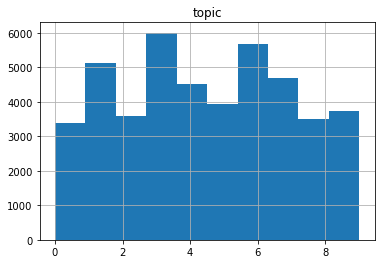

In [52]:
T[['topic']].hist()

In [25]:
list(T.loc[T['topic']==0,'Title'][0:10])

['Machine learning approach to support taxonomic species discrimination based on helminth collections data',
 'Federated deep learning for detecting COVID-19 lung abnormalities in CT: a privacy-preserving multinational validation study',
 'Multimodal patient-specific registration for breast imaging using biomechanical modeling with reference to AI evaluation of breast tumor change',
 'Interpretable deep learning as a means for decrypting disease signature in multiple sclerosis',
 'Updated Trends in\xa0Imaging Practices for Pancreatic Neuroendocrine Tumors (PNETs): A Systematic Review and Meta-Analysis to Pave the Way for Standardization in the New Era of Big Data and Artificial Intelligence',
 'Can Clinical Symptoms and Laboratory Results Predict CT Abnormality? Initial Findings Using Novel Machine Learning Techniques in Children With COVID-19 Infections',
 'Use of soft computing techniques for tunneling optimization of tunnel boring machines',
 'Ultrasound volume projection image qual

20690